### Mean Shift uses a kernel function, usually Gaussian, to define the similarity between data points. The kernel function is defined in both spatial and feature space

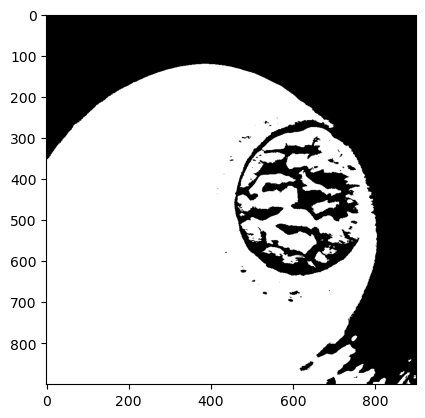

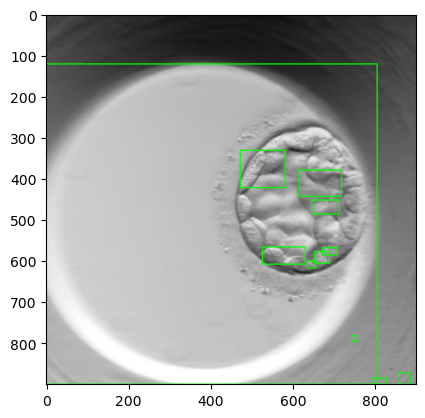

In [6]:
import cv2
import numpy as np

def mean_shift_object_detection(image_path, spatial_radius, color_radius, min_size_threshold):
    # Read the image
    image = cv2.imread(image_path)
    
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    ms_image = cv2.pyrMeanShiftFiltering(lab_image, spatial_radius, color_radius)
    result_image = cv2.cvtColor(ms_image, cv2.COLOR_LAB2BGR)

    gray_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2GRAY)
    '''
    the thresholding method, which means pixels with intensity greater than or equal to the threshold value 
    (115 in this case) will be set to the maximum value (255), and pixels below the threshold will be set to 0.
    '''
    
    _, binary_mask = cv2.threshold(gray_image,150, 255, cv2.THRESH_BINARY)
    plt.imshow(binary_mask,cmap='gray')
    plt.show()
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    min_size=100
    largest_contour = max(contours, key=cv2.contourArea)
    object_contour = [contour for contour in contours if cv2.contourArea(contour) > min_size]
    
    # Draw bounding boxes around the detected objects
    for contour in object_contour:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
    return image

if __name__ == "__main__":
    input_image_path = r'D:\Users\miste\Desktop\Projet Aziza Othmana\WORK\Updated_datasetAzizaOthmana\Images\MTL-0130-0EFD-D6E0-0001.jpg'
    spatial_radius = 5  
    color_radius = 5  
    min_size_threshold = 0.01  

    result_image = mean_shift_object_detection(input_image_path, spatial_radius, color_radius, min_size_threshold)
    plt.imshow(result_image,cmap='gray')
    plt.show()

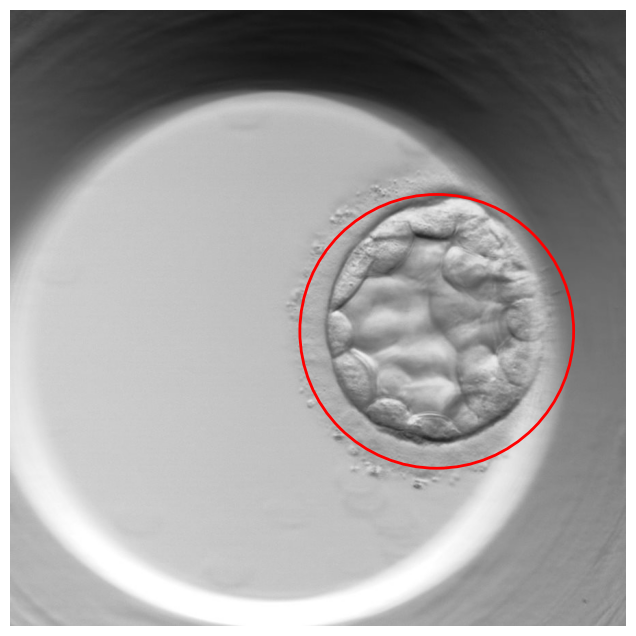

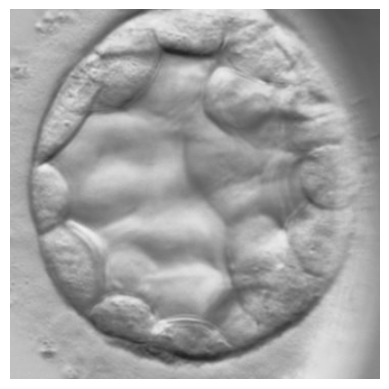

In [5]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
image_path=r"C:\Users\Arij\Desktop\DatasetAzizaOthmana\Sans Filtre\Updated_datasetAzizaOthmana\Images\MTL-0130-0EFD-D6E0-0001.jpg"

img = cv2.imread(image_path, cv2.IMREAD_COLOR)
def detect_circle_and_plot(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Detect circles in the image
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1.2, 100)
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        if len(circles) > 0:
            max_circle = max(circles, key=lambda item: item[2])
        else:
            return None
        # Returning the coordinates of the center of the circle
        x, y, r = max_circle

        # Plot the circle on the original image
        plt.figure(figsize=(8, 8))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
        circle = plt.Circle((x, y), r+40, fill=False, color='red', linewidth=2)
        plt.gca().add_patch(circle)
        plt.axis('off')
        plt.show()
        h, w, _ = img.shape
        x1, y1 = max(0, x - r-20), max(0, y - r-20)
        x2, y2 = min(w, x + r+20), min(h, y + r+20)
        cropped_image = img[y1:y2, x1:x2]
        enhanced_image = cv2.resize(cropped_image , (400, 400))
        plt.imshow(enhanced_image)
        plt.axis('off')
        plt.show()
        return enhanced_image



image = cv2.imread(image_path, cv2.IMREAD_COLOR)
enhanced_image=detect_circle_and_plot(image)
        
        
        
